In [1]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from math import sqrt
from utils import get_test_table
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_train, X_test, y_train, y_test = get_test_table(scaled=True, drop_date=True)

In [4]:
from sklearn.model_selection import GridSearchCV

param_grid = {
	'alpha': [0.001, 0.01, 0.1, 1, 10],  # multiplies the L2 term, controlling regularization strength
	'solver': ['auto', 'svd', 'lsqr'],  # to use in the computational routines
	'max_iter': [1000, 5000, 8000],  # maximum number of iterations for conjugate gradient solve
	'tol': [1e-3, 1e-4]  # precision of the solution (coef_), specifies a different convergence criterion
}

grid_search = GridSearchCV(
	estimator = Ridge(), 
	param_grid = param_grid, 
	scoring = 'neg_mean_squared_error', 
	cv = 5
)

grid_search.fit(X_train, y_train)

best_parameters = grid_search.best_params_
print(f'Best Parameters: {best_parameters}')

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

y_pred_clipped = np.clip(y_pred, a_min=0, a_max=None)

rmse = mean_squared_error(y_test, y_pred_clipped, squared=False)
print(f'RMSE of the best model: {rmse}')

Best Parameters: {'alpha': 0.01, 'max_iter': 1000, 'solver': 'svd', 'tol': 0.001}
RMSE of the best model: 0.05088432506212885


In [5]:
# The model with best params
ridge_best = Ridge(
	alpha = best_parameters['alpha'], 
	solver = best_parameters['solver'], 
	max_iter = best_parameters['max_iter'],
	tol = best_parameters['tol']
)

ridge_best.fit(X_train, y_train)

Ridge(alpha=0.01, max_iter=1000, solver='svd', tol=0.001)

In [7]:
coefficients = ridge_best.coef_
feature_names = X_train.columns

# Pair the feature names with the coefficients
feature_importance = list(zip(feature_names, coefficients))

# Sort the features by the absolute value of their coefficients
sorted_feature_importance = sorted(feature_importance, key=lambda x: abs(x[1]), reverse=True)

# Display the sorted feature importance
for feature, coef in sorted_feature_importance:
	print(
		f"Feature: {feature:<{len(max(feature_names, key=len))}}, "
		f"Coefficient: {abs(coef)}"
	)

Feature: 2m_temp_mean           , Coefficient: 0.9938207235820535
Feature: 2m_dp_temp_mean        , Coefficient: 0.57871408743437
Feature: 2m_temp_max            , Coefficient: 0.4361783242729622
Feature: 10m_wind_u             , Coefficient: 0.21704889929807292
Feature: 2m_dp_temp_min         , Coefficient: 0.19937460552596892
Feature: total_et               , Coefficient: 0.17579693419360193
Feature: surf_net_solar_rad_mean, Coefficient: 0.1578807183441744
Feature: 2m_dp_temp_max         , Coefficient: 0.14612486601724672
Feature: 2m_temp_min            , Coefficient: 0.12266213696347532
Feature: surf_press             , Coefficient: 0.09663115740347747
Feature: surf_net_therm_rad_max , Coefficient: 0.06240301202761006
Feature: swe                    , Coefficient: 0.050504131804739553
Feature: surf_net_therm_rad_mean, Coefficient: 0.04371346061124036
Feature: surf_net_solar_rad_max , Coefficient: 0.037298809279576156
Feature: fcst_alb               , Coefficient: 0.02927006959084166

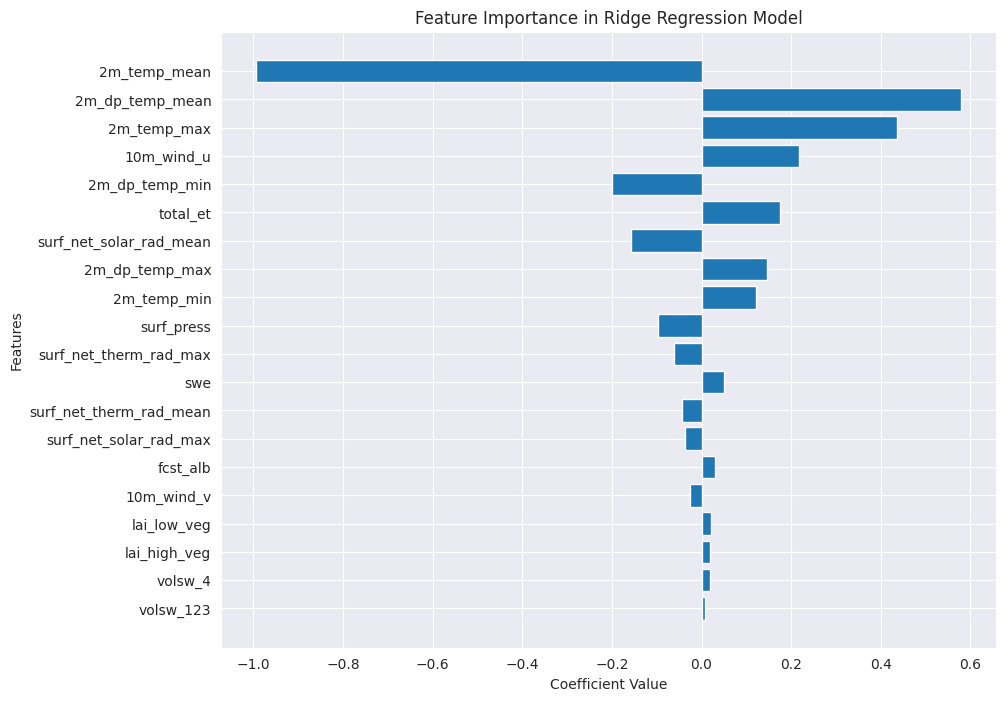

In [8]:
features, coefficients = zip(*sorted_feature_importance)
plt.figure(figsize=(10, 8))
plt.barh(features, coefficients)  # Horizontal bar plot
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance in Ridge Regression Model')
plt.gca().invert_yaxis()
plt.show()

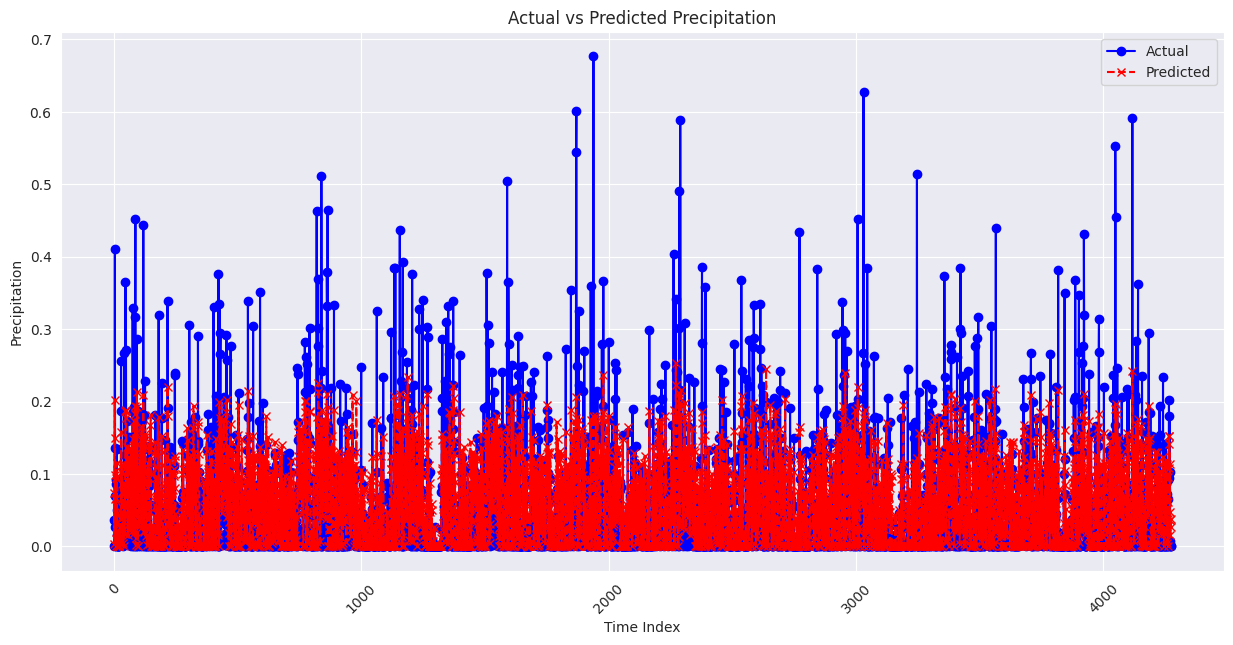

In [9]:
index = range(len(y_test))

plt.figure(figsize=(15, 7))
plt.plot(index, y_test, label='Actual', color='blue', marker='o')

plt.plot(index, y_pred_clipped, label='Predicted', color='red', linestyle='--', marker='x')

plt.title('Actual vs Predicted Precipitation')
plt.xlabel('Time Index')
plt.ylabel('Precipitation')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()